<a href="https://colab.research.google.com/github/Ahmed-Ashraf-Marzouk/data-mining-algorithms/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn


# Loading the Data

In [ ]:
!gdown "1uDSWhhUBPFjjUJmsh4-FLiRM2AakrC8f"
!unrar x "./dataset.rar" -idq

Downloading...
From: https://drive.google.com/uc?id=1uDSWhhUBPFjjUJmsh4-FLiRM2AakrC8f
To: /content/dataset.rar
100% 3.82k/3.82k [00:00<00:00, 5.53MB/s]


Would you like to replace the existing file dataset/heart.csv
 11323 bytes, modified on 2021-03-22 09:41
with a new one
 11323 bytes, modified on 2021-03-22 09:41

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit 

# Data Wrangling

## Column Description
1. **age** : Age of the patient
2. **Gender** : Sex of the patient
3. **exang**: exercise induced angina (1 = yes; 0 = no)
4. **ca**: number of major vessels (0-3)
5. **cp** : Chest Pain type chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic

6. **trtbps** : resting blood pressure (in mm Hg)
7. **chol** : cholestoral in mg/dl fetched via BMI sensor
8. **fbs** : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false
9. **rest_ecg** : resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

10. **thalach** : maximum heart rate achieved


11. **oldpeak** : Previous peak

12. **slp** : Slope

13. **thall** : Thal rate

14. **Output** : 0= less chance of heart attack 1= more chance of heart attack

In [ ]:
col_names = ['Age','Gender','CP', 'Trtbps', 'Chol', 'FBS', 'Rest_ecg', 'Thalach', 'Exang', 'Old_peak', 'Slope', 'CA', 'Thall', 'Output']
df = pd.read_csv('dataset/heart.csv', header = 0, names = col_names)
rearranged_col_names = ['Age', 'Gender', 'Exang', 'CA', 'CP', 'Trtbps', 'Chol', 'FBS', 'Rest_ecg', 'Thalach', 'Old_peak', 'Slope','Thall', 'Output']
df = df[rearranged_col_names]
df.head()

,Age,Gender,Exang,CA,CP,Trtbps,Chol,FBS,Rest_ecg,Thalach,Old_peak,Slope,Thall,Output
0,63,1,0,0,3,145,233,1,0,150,2.3,0,1,1
1,37,1,0,0,2,130,250,0,1,187,3.5,0,2,1
2,41,0,0,0,1,130,204,0,0,172,1.4,2,2,1
3,56,1,0,0,1,120,236,0,1,178,0.8,2,2,1
4,57,0,1,0,0,120,354,0,1,163,0.6,2,2,1




---



## Checking the Data

In [ ]:
df.info() # No null values in dataset
# 303 Examples
# 14 Features
# (303) X (14)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       303 non-null    int64  
 1   Gender    303 non-null    int64  
 2   Exang     303 non-null    int64  
 3   CA        303 non-null    int64  
 4   CP        303 non-null    int64  
 5   Trtbps    303 non-null    int64  
 6   Chol      303 non-null    int64  
 7   FBS       303 non-null    int64  
 8   Rest_ecg  303 non-null    int64  
 9   Thalach   303 non-null    int64  
 10  Old_peak  303 non-null    float64
 11  Slope     303 non-null    int64  
 12  Thall     303 non-null    int64  
 13  Output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()
# Gender range between 29 and 77 which is acceptable range
# Number of major vessales (column name CA) should be between 0 and 3, but 4 can be found.
# Resting blood pressure (column name Trtbps) have a maximum value of 200 mm Hg, is this possible?
# Maximum heart rate achieved (column name Thalach) have a maximum value of 202 units, is this possible?

,Age,Gender,Exang,CA,CP,Trtbps,Chol,FBS,Rest_ecg,Thalach,Old_peak,Slope,Thall,Output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.326733,0.729373,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,1.039604,1.399340,2.313531,0.544554
std,9.082101,0.466011,0.469794,1.022606,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,1.161075,0.616226,0.612277,0.498835
min,29.000000,0.000000,0.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,1.000000,2.000000,0.000000
50%,55.000000,1.000000,0.000000,0.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.800000,1.000000,2.000000,1.000000
75%,61.000000,1.000000,1.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.600000,2.000000,3.000000,1.000000
max,77.000000,1.000000,1.000000,4.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,6.200000,2.000000,3.000000,1.000000


In [ ]:
df['Output'].value_counts(normalize=True) # Each class is about 50%

1    0.544554
0    0.455446
Name: Output, dtype: float64

# Data visualization and clearning

## Outlier detection and removal

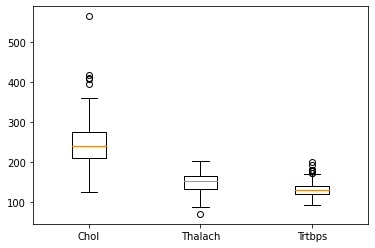

In [ ]:
# selected columns before removing outliers
arr = [df['Chol'].to_numpy(), df['Thalach'].to_numpy(), df['Trtbps'].to_numpy()]
plt.boxplot(arr)
plt.xticks([1, 2, 3], ['Chol', 'Thalach', 'Trtbps'])
plt.show()

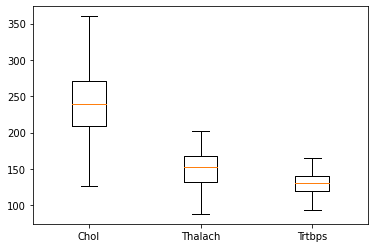

In [ ]:
# Cleaned data after removing outliers
df = df.loc[df['Chol'] < 380]
df = df.loc[df['Thalach'] > 80]
df = df.loc[df['Trtbps'] < 170]
arr = [df['Chol'].to_numpy(), df['Thalach'].to_numpy(), df['Trtbps'].to_numpy()]
plt.boxplot(arr)
plt.xticks([1, 2, 3], ['Chol', 'Thalach', 'Trtbps'])
plt.show()

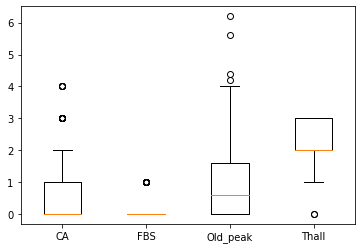

In [ ]:
# selected columns before removing outliers 
arr = [df['CA'].to_numpy(), df['FBS'].to_numpy(), df['Old_peak'].to_numpy(), df['Thall'].to_numpy()]
plt.boxplot(arr)
plt.xticks([1, 2, 3, 4], ['CA', 'FBS', 'Old_peak', 'Thall'])
plt.show()

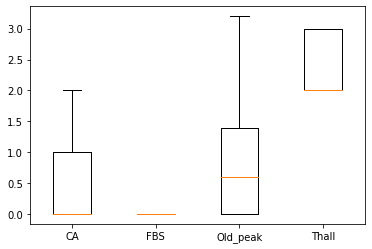

In [ ]:
# Cleaned data after removing outliers
df = df.loc[df['CA'] < 2.5]
df = df.loc[df['FBS'] < 0.5]
df = df.loc[df['Old_peak'] < 3.5]
df = df.loc[df['Thall'] > 1]
arr = [df['CA'].to_numpy(), df['FBS'].to_numpy(), df['Old_peak'].to_numpy(), df['Thall'].to_numpy()]
plt.boxplot(arr)
plt.xticks([1, 2, 3, 4], ['CA', 'FBS', 'Old_peak', 'Thall'])
plt.show()

In [ ]:
sns.kedplot(df['T'])

## Correlation matrix

Correlation matrix helps us to detect correlated features in our data set. So, we can remove strongly correlated data with small effect on our final machine learning model. 

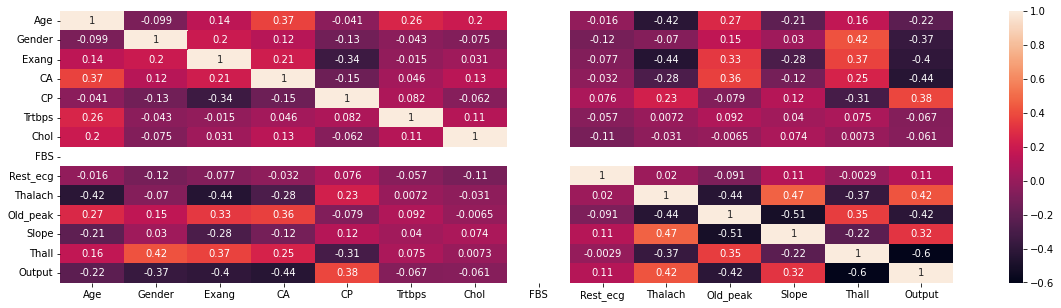

In [ ]:
corrMatrix = df.corr()
plt.figure(figsize=(20,5))
sn.heatmap(corrMatrix, annot=True)


## Correlation between age and heart rate

No handles with labels found to put in legend.


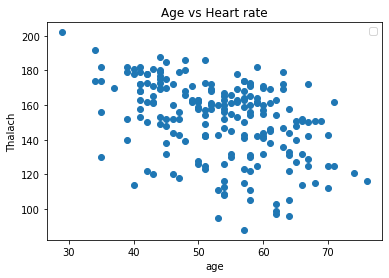

In [ ]:
# scatter plot between $age and $heart_rate
age_x = df['Age']
heart_rate_y = df['Thalach'] 
plt.scatter(age_x, heart_rate_y)
plt.xlabel('age')
plt.ylabel('Thalach')
plt.title('Age vs Heart rate')
plt.legend()
plt.show()
# From graph below we can see that age is inversely correlated with heart rate. When age increases heart rate decreases.

1    134
0     73
Name: Gender, dtype: int64


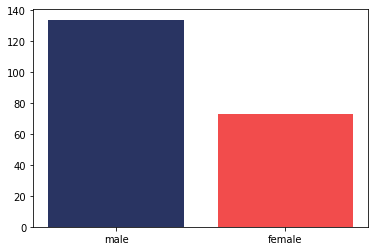

In [ ]:
# assume that 0: female and 1: male
count = df['Gender'].value_counts()
print(count)
plt.bar(['male', 'female'], count, color=['#293462', '#F24C4C'])
plt.show()
# according to the graph our data has more men than women, which may lead to bias towards men in our machine learning detection model

# Saving the Cleaned Data Frame

In [ ]:
from os.path import exists

##############################################################################################################
##                                                                                                          ##
##      Ignore this, Change file_path, file_name, and df_to_save then run the cell and wait for output.     ##
def save_df(local_path, file_name, df_to_save):
    overwrite = True

    if not(exists('/content/' + local_path)):
        overwrite = False
        print(f"\n!! Saving failed, path to folder does not exist, {'/content/' + local_path}")

    if(exists(local_path+file_name)):
        try:
            overwrite = int(input('This file already exists!\n\nDo you wish to overwrite it? [1]Yes, [0]No:  '))
        except:
            overwrite = False
            print("\n!! Saving failed, please enter either 1 or 0.")



    if(overwrite):
        print(f"\n\nFile Saved to {'/content/' + local_path + file_name}")
        df_to_save.to_csv('/content/' + local_path + file_name)
    else:
        print('\n\nNo Changes')
##                                                                                                          ##
##############################################################################################################

local_path = 'Clean DataFrame/' # must end with '/'
# this folder must exists with the Google Colab 'content' folder (the default one)
# if it does not, then create it manualy.

file_name = 'cleaned_data.csv'
# the name of the csv file

df_to_save = df.copy()
# The name of the df to save

save_df(local_path, file_name, df_to_save) # Check output.
# download locally if needed




File Saved to /content/Clean DataFrame/cleaned_data.csv
